In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

# EDA

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 'data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB



# Normalization Function

In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(df.iloc[:,1:])

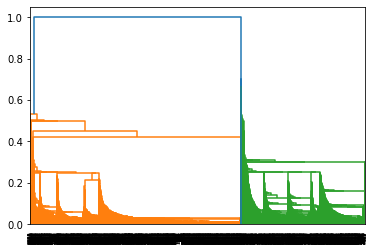

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

In [7]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete').fit(df_norm)
cluster=pd.Series(hc.labels_)
cluster
df['Cluster']=cluster
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [8]:
df.iloc[:,1:].groupby('Cluster').mean().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,59968.43,88.88,1.71,1.00,1.01,10271.53,9.11,227.80,0.66,3825.39,0.00
1,157084.58,208.67,4.66,1.00,1.06,70477.09,23.25,1019.43,3.20,5770.57,1.00
2,80173.96,248.55,2.10,1.01,1.00,16882.86,13.41,739.96,2.24,4304.38,1.00
3,131999.50,347.00,2.50,1.00,1.00,65634.25,69.25,19960.00,49.25,2200.25,1.00
4,45515.06,32.26,1.00,2.48,1.00,14618.87,16.13,443.23,1.97,3784.26,0.19


# K - Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

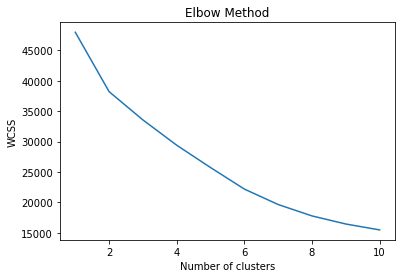

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [13]:
df['clusterid_new'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-2.89532238e-01, -7.34863292e-02, -5.25291897e-01,
        -9.82418871e-02, -6.03502961e-02, -5.01887697e-01,
        -4.45389400e-01, -2.12559588e-01, -2.33817962e-01,
        -2.23767550e-01, -7.66919299e-01, -7.30291870e-01],
       [ 7.97059469e-01,  5.68314510e-03,  1.59289262e+00,
        -8.84675599e-02, -4.79829681e-02,  1.46296248e+00,
         9.01613233e-01, -4.71794783e-02, -4.94229191e-02,
         5.35754126e-01,  2.72981762e-01, -9.71661636e-02],
       [ 1.28268449e+00,  9.79096000e-01,  1.68844311e-01,
         9.95277109e-02, -6.27665798e-02,  7.25873307e-01,
         1.80724874e+00,  3.84281759e+00,  4.13360120e+00,
         2.71115595e-01,  9.86490520e-01,  8.36112667e-01],
       [-1.19804094e-01,  1.83587430e-02, -2.77743687e-02,
         2.48954692e-01, -6.27665798e-02, -9.37824912e-02,
         4.45795680e-02, -4.22086019e-02, -3.60296251e-02,
         6.03178633e-02,  1.25384956e+00,  1.45608093e+00],
       [ 6.39719256e-01, -8.44329231e-02,  1.0220844

In [14]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2258.546698,44427.172170,87.267925,1.336321,1.000000,1.000472,5025.288208,7.325000,162.465094,0.486792,3656.507075,0.000000,0.000000
1,1,1410.076479,153915.481962,148.510823,4.252525,1.001443,1.002886,52472.388167,20.259740,394.002886,1.186147,5224.825397,0.502165,0.595960
2,2,1743.043796,202848.547445,901.510949,2.291971,1.029197,1.000000,34673.197080,28.956204,5840.131387,17.051095,4678.379562,0.846715,1.474453
3,3,1961.500000,61529.500000,158.316248,2.021277,1.051257,1.000000,14880.191489,12.029981,400.962282,1.236944,4243.108317,0.975822,2.058027
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.400000


# DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps = 0.8, min_samples = 6)
dbscan.fit(scaled_df)
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
cl=pd.DataFrame(dbscan.labels_,columns = ['cluster_DBscan'])
cl.head()

,cluster_DBscan
0,0
1,0
2,0
3,0
4,-1


In [18]:
pd.concat([df,cl],axis = 1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,clusterid_new,cluster_DBscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,3,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,3,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,3,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0
